In [ ]:
%matplotlib inline
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv

: 

In [ ]:
print(f"Importando do arquivo .env: {load_dotenv(dotenv_path=r'../.env')}")

: 

In [ ]:
#https://www.youtube.com/watch?v=MEEVcpnfElY
leituras_dique6c = pd.read_csv('./leituras_dique6c.csv')
leituras_bvsa = pd.read_csv('./leituras_bvsa.csv')

: 

In [ ]:
loc_bvsa = pd.read_csv('./loc_bvsa.csv', sep=';', decimal=',')
loc_dique6c = pd.read_csv('./loc_dique6c.csv', sep=';', decimal=',')

: 

In [5]:
loc_sensores = pd.read_excel('./LOCALIZAÇÃO_SENSORES.xlsx', engine='openpyxl', header=2)

In [6]:
leituras_bvsa['area'] = 'BVSA'
leituras_bvsa['area'] = 'Dique 6C'

In [7]:
leituras = pd.concat([leituras_bvsa, leituras_dique6c])
leituras = leituras.rename(columns={"Sensor":"sensor", "Data":"data", "Valor":"valor", "Unidade":"unidade", "Direcao_Saida":"direcao_saida", "Estado":"estado"})
leituras['direcao_saida'] = leituras['direcao_saida'].replace('Cota NA', 'Cota do NA')

In [8]:
leituras[leituras['direcao_saida'] == 'Cota do NA']['valor'].mean()

88.14659755901754

In [9]:
leituras['direcao_saida'].value_counts()

Cota Piezométrica                             19204
Carga Piezométrica                            19204
Vazão                                         10554
Cota do NA                                     6227
Recalque (Z)                                   1007
Deslocamento Longitudinal (X)                  1007
Deslocamento Transversal (Y)                   1007
Recalque                                        819
Deslocamento do Afastamento Mont(-)/Jus(+)      819
Deslocamento da Estaca Dir(-)/Esq(+)            819
Leitura                                          32
Name: direcao_saida, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#leituras['id_sensor'] = le.fit_transform(leituras['sensor'])
leituras['id_unidade'] = le.fit_transform(leituras['unidade']) +1
leituras['id_direcao_saida'] = le.fit_transform(leituras['direcao_saida']) +1
leituras['id_estado'] = le.fit_transform(leituras['estado']) +1
leituras['id_area'] = le.fit_transform(leituras['area']) + 1

leituras = leituras.reset_index(drop=True)

In [11]:
#Criação da tabela de sensores

In [12]:
aux = pd.concat([leituras_bvsa[['Sensor']], leituras_dique6c[['Sensor']], loc_bvsa[['Sensor']], loc_dique6c[['Sensor']]])
tabela_sensores = aux.drop_duplicates().sort_values(by=['Sensor']).reset_index()
tabela_sensores['Sensor'] = tabela_sensores['Sensor'].apply(lambda x: x.replace("‐", '-').strip())
tabela_sensores.index = tabela_sensores.index+1

In [13]:
tabela_sensores

index        Sensor
1       56   IN-BM-BV-11
2       57   IN-BM-BV-12
3    18474   MNA-AEF1-01
4    18404   MNA-AEF1-02
5     3024  MNA-BM-BV-51
..     ...           ...
301     32   RN-BM-BV-04
302     49    RN-D06C-01
303     50    RN-D06C-02
304     51    RN-D06C-03
305     52    RN-D06C-04

[305 rows x 2 columns]

In [14]:
pd.concat([leituras_bvsa[['Sensor']], leituras_dique6c[['Sensor']], loc_bvsa[['Sensor']], loc_dique6c[['Sensor']]]).sort_values(by=['Sensor']).reset_index(drop=True).drop_duplicates().to_csv('lista de sensores.csv')

In [15]:
tabela_sensores.reset_index()[['Sensor','index']].to_dict()

{'Sensor': {0: 'IN-BM-BV-11',
  1: 'IN-BM-BV-12',
  2: 'MNA-AEF1-01',
  3: 'MNA-AEF1-02',
  4: 'MNA-BM-BV-51',
  5: 'MNA-BM-BV-81',
  6: 'MNA-SM-7500A (I)',
  7: 'MNA-SM-7500A (S)',
  8: 'MNA-SM-7502A (I)',
  9: 'MNA-SM-7502A (S)',
  10: 'MNA-SM-7531',
  11: 'MNA-SM-7533',
  12: 'MNA-SM-7534',
  13: 'MNA-SM-7535 (I)',
  14: 'MNA-SM-7535 (S)',
  15: 'MNA-SM-7537 (I)',
  16: 'MNA-SM-7537 (S)',
  17: 'MNA-SM-7538 (I)',
  18: 'MNA-SM-7538 (S)',
  19: 'MNA-SM-7539 (I)',
  20: 'MNA-SM-7539 (S)',
  21: 'MNA-SM-7540 (I)',
  22: 'MNA-SM-7540 (S)',
  23: 'MNA-SM-7541 (I)',
  24: 'MNA-SM-7541 (S)',
  25: 'MNA-SM-7542 (I)',
  26: 'MNA-SM-7542 (S)',
  27: 'MNA-BM-BV-51',
  28: 'MNA-BM-BV-81',
  29: 'MR-BM-BV-11',
  30: 'MR-BM-BV-31',
  31: 'MS-BM-BV-01-ER',
  32: 'MS-BM-BV-01-TC',
  33: 'MS-BM-BV-02-ER',
  34: 'MS-BM-BV-02-TC',
  35: 'MS-BM-BV-11-ER',
  36: 'MS-BM-BV-11-TC',
  37: 'MS-BM-BV-12-ER',
  38: 'MS-BM-BV-12-TC',
  39: 'MS-BM-BV-21-ER',
  40: 'MS-BM-BV-21-TC',
  41: 'MS-BM-BV-22-ER',
  42:

In [16]:
dict_sensores = tabela_sensores.reset_index()[['Sensor','index']].to_dict(orient = 'tight')
dict_sensores = dict(dict_sensores['data']);

ValueError: orient 'tight' not understood

In [ ]:
leituras['id_sensor'] = leituras['sensor'].map(dict_sensores) +1

In [ ]:
leituras = leituras[['id_sensor','id_unidade', 'id_direcao_saida', 'id_estado', 'id_area', 'sensor', 'data', 'valor', 'unidade', 'direcao_saida', 'estado', 'area']]

In [ ]:
sensores = pd.DataFrame(tabela_sensores)
sensores = sensores.rename(columns={"Sensor":"name"})
sensores

name
1     IN‐BM‐BV‐11
2     IN‐BM‐BV‐12
3     MNA-AEF1-01
4     MNA-AEF1-02
5    MNA-BM-BV-51
..            ...
301   RN‐BM‐BV‐04
302    RN‐D06C‐01
303    RN‐D06C‐02
304    RN‐D06C‐03
305    RN‐D06C‐04

[305 rows x 1 columns]

In [ ]:
#Criação da Tabela de Unidade

In [ ]:
tabela_unidades = pd.concat([leituras_bvsa['Unidade'], leituras_dique6c['Unidade']])
tabela_unidades = tabela_unidades.drop_duplicates().sort_values().reset_index(drop=True)
unidades = pd.DataFrame(tabela_unidades)
unidades = unidades.rename(columns={"Unidade":"name"})
unidades

name
0   l/min
1     l/s
2       m
3   m.c.a
4  m3/min
5    m3/s
6     seg

In [ ]:
#Tabela de Direcao Saida

In [ ]:
tabela_direcao_saida = pd.concat([leituras_bvsa['Direcao_Saida'], leituras_dique6c['Direcao_Saida']])
tabela_direcao_saida = tabela_direcao_saida.drop_duplicates().sort_values().reset_index(drop=True)
direcao_saida = pd.DataFrame(tabela_direcao_saida)
direcao_saida = direcao_saida.rename(columns={"Direcao_Saida":"name"})
direcao_saida

name
0                           Carga Piezométrica
1                                      Cota NA
2                            Cota Piezométrica
3                                   Cota do NA
4                Deslocamento Longitudinal (X)
5                 Deslocamento Transversal (Y)
6         Deslocamento da Estaca Dir(-)/Esq(+)
7   Deslocamento do Afastamento Mont(-)/Jus(+)
8                                      Leitura
9                                     Recalque
10                                Recalque (Z)
11                                       Vazão

In [ ]:
# Tabela de Estado
leituras['estado'].value_counts()

estado
normal     60289
atencao      320
alerta        90
Name: count, dtype: int64

In [ ]:
# Leituras duplicadas
#leituras[leituras.duplicated(keep=False)]
leituras = leituras.drop_duplicates()

In [ ]:
#Tratamento dos dados de localização
import geopandas as gpd

In [ ]:
localizacao = gpd.GeoDataFrame(pd.concat([loc_bvsa, loc_dique6c]))
localizacao = localizacao.rename(columns={"Sensor":"sensor", "Latitude":"latitude", "Longitude":"longitude", "Altura":"altura"})

In [ ]:
localizacao['sensor'] = localizacao['sensor'].apply(lambda x: x.replace("‐", '-').strip())

In [ ]:
localizacao['id_sensor'] = localizacao['sensor'].map(dict_sensores)

In [ ]:
localizacao

sensor             N            E  latitude  longitude  altura  \
0   PZ-BM-BV-11  9.652626e+09  412507056.0 -3.142831 -51.787880   74.48   
1   PZ-BM-BV-12  9.652626e+09  412507056.0 -3.142831 -51.787880   59.15   
2   PZ-BM-BV-13  9.652636e+09  412475409.0 -3.142733 -51.788165   69.96   
3   PZ-BM-BV-14  9.652636e+09  412475409.0 -3.142733 -51.788165   54.44   
4   PZ-BM-BV-15  9.652622e+09  412336622.0 -3.142866 -51.789414   65.00   
..          ...           ...          ...       ...        ...     ...   
56   MV-D06C-04  9.652152e+09  413817837.0 -3.147122 -51.776087   65.00   
57   RM-D06C-01  9.651928e+09  413655231.0 -3.149147 -51.777552  100.00   
58   RM-D06C-02  9.651928e+09  413655231.0 -3.149147 -51.777552  100.00   
59   RM-D06C-03  9.651928e+09  413655231.0 -3.149147 -51.777552  100.00   
60   RM-D06C-04  9.651928e+09  413655231.0 -3.149147 -51.777552  100.00   

    id_sensor  
0       181.0  
1       182.0  
2       183.0  
3       184.0  
4       185.0  
..        ...  
56      137.0  
57        NaN  
58        NaN  
59        NaN  
60        NaN  

[121 rows x 7 columns]

In [ ]:
x_latitude = localizacao['latitude']
y_longitude = localizacao['longitude']
z_altura = localizacao['altura']

In [ ]:
localizacao['geom'] = gpd.GeoSeries.from_xy(x =x_latitude, y=y_longitude, z=z_altura)

In [ ]:
localizacao = localizacao[['id_sensor', 'sensor', 'latitude', 'longitude', 'altura', 'geom']]

In [ ]:
localizacao.head()

id_sensor       sensor  latitude  longitude  altura  \
0      181.0  PZ-BM-BV-11 -3.142831 -51.787880   74.48   
1      182.0  PZ-BM-BV-12 -3.142831 -51.787880   59.15   
2      183.0  PZ-BM-BV-13 -3.142733 -51.788165   69.96   
3      184.0  PZ-BM-BV-14 -3.142733 -51.788165   54.44   
4      185.0  PZ-BM-BV-15 -3.142866 -51.789414   65.00   

                                    geom  
0  POINT Z (-3.14283 -51.78788 74.48000)  
1  POINT Z (-3.14283 -51.78788 59.15000)  
2  POINT Z (-3.14273 -51.78816 69.96000)  
3  POINT Z (-3.14273 -51.78816 54.44000)  
4  POINT Z (-3.14287 -51.78941 65.00000)

In [ ]:
import sqlite3
con = sqlite3.connect("database.db")

In [ ]:
cur = con.cursor()

In [ ]:
cur.execute("CREATE TABLE if not exists sensores(id INTEGER PRIMARY KEY AUTOINCREMENT, name text)");
cur.execute("CREATE TABLE if not exists unidades(id INTEGER PRIMARY KEY AUTOINCREMENT, name text)");
cur.execute("CREATE TABLE if not exists direcao_saida(id INTEGER PRIMARY KEY AUTOINCREMENT, name text)");
cur.execute("CREATE TABLE if not exists localizacao(id_sensor integer, sensor text, latitude float, longitude float, altura float, geom)");
cur.execute("CREATE TABLE if not exists leituras(id_sensor integer, id_unidade integer, id_direcao_saida integer, id_estado integer, id_area integer, sensor text, data date, valor float, unidade text, direcao_saida text, estado text, area text)");

In [ ]:
localizacao_ = localizacao[['id_sensor', 'sensor', 'latitude', 'longitude', 'altura']]

In [ ]:
sensores.to_sql('sensores', con=con, if_exists='replace', index=False)
unidades.to_sql('unidades', con=con, if_exists='replace', index=False)
direcao_saida.to_sql('direcao_saida', con=con, if_exists='replace', index=False)
localizacao_.to_sql('localizacao', con=con, if_exists='replace', index=False)
leituras.to_sql('leituras', con=con, if_exists='replace', index=False)

60670

In [ ]:
# Não há dados de localização dos densores da tabela de leituras
a = leituras['sensor'].drop_duplicates().to_list() + localizacao['sensor'].drop_duplicates().to_list()
pd.DataFrame(a).value_counts();

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
leituras[['unidade', 'direcao_saida']].value_counts()

unidade  direcao_saida                             
m        Cota Piezométrica                             19200
m.c.a    Carga Piezométrica                            19200
m        Cota do NA                                     6206
l/min    Vazão                                          3518
l/s      Vazão                                          3518
m3/s     Vazão                                          3486
m        Deslocamento Longitudinal (X)                  1007
         Deslocamento Transversal (Y)                   1007
         Recalque (Z)                                   1007
         Deslocamento da Estaca Dir(-)/Esq(+)            819
         Deslocamento do Afastamento Mont(-)/Jus(+)      819
         Recalque                                        819
m3/min   Vazão                                            32
seg      Leitura                                          32
Name: count, dtype: int64

In [ ]:
#Sensor indicado sob orinetação Prof. Adam
leituras[leituras['sensor'] == 'PZ-BM-BV-52']['estado'].value_counts()

estado
normal     466
atencao    242
alerta      90
Name: count, dtype: int64

In [ ]:
leituras.head()

id_sensor  id_unidade  id_direcao_saida  id_estado  id_area       sensor  \
0        196           3                 2          3        1  PZ-BM-BV-54   
1        196           4                 1          3        1  PZ-BM-BV-54   
2        195           4                 1          3        1  PZ-BM-BV-53   
3        195           3                 2          3        1  PZ-BM-BV-53   
4        195           3                 2          3        1  PZ-BM-BV-53   

                  data  valor unidade       direcao_saida  estado      area  
0  2013-09-28 11:30:00  24.57       m   Cota Piezométrica  normal  Dique 6C  
1  2013-09-28 11:30:00   0.00   m.c.a  Carga Piezométrica  normal  Dique 6C  
2  2013-10-07 10:40:00   0.00   m.c.a  Carga Piezométrica  normal  Dique 6C  
3  2013-10-07 10:40:00  27.74       m   Cota Piezométrica  normal  Dique 6C  
4  2013-10-09 14:49:00  27.74       m   Cota Piezométrica  normal  Dique 6C

In [ ]:
profile = ProfileReport(leituras, title="leituras")
profile;

In [ ]:
profile = ProfileReport(localizacao_, title="Localização")
profile;

In [ ]:
query = '''
select l.id_sensor, id_unidade, id_direcao_saida, id_area, id_estado, l.sensor, strftime('%m', "data") AS "month", data, valor, unidade, direcao_saida, estado, latitude, longitude, altura, l.area
from leituras l
left join localizacao l2 on l.id_sensor = l2.id_sensor
where l2.id_sensor is not null and "data" >= '2016-02-01'
order by l.sensor
'''

In [ ]:
df = pd.read_sql(query, con=con)

In [ ]:
df.shape

(36957, 16)

In [ ]:
df = df[df['sensor'] != 'MNA-BM-BV-51']
df = df[df['sensor'] != 'PZ-D06C-17A']
df = df[df['sensor'] != 'PZ-D06C-18A']
df = df[df['sensor'] != 'MV-BM-BV-02']
df = df[df['sensor'] != 'MNA-AEF1-02']
df = df[df['sensor'] != 'PA-D06C-21']

In [ ]:
x_longitude = df['longitude']
y_latitude = df['latitude']
z_altura = df['altura']
df['geom'] = gpd.GeoSeries.from_xy(x = x_longitude, y=y_latitude)#, z=z_altura)

In [ ]:
gdf = gpd.GeoDataFrame(df, crs="4326", geometry="geom")

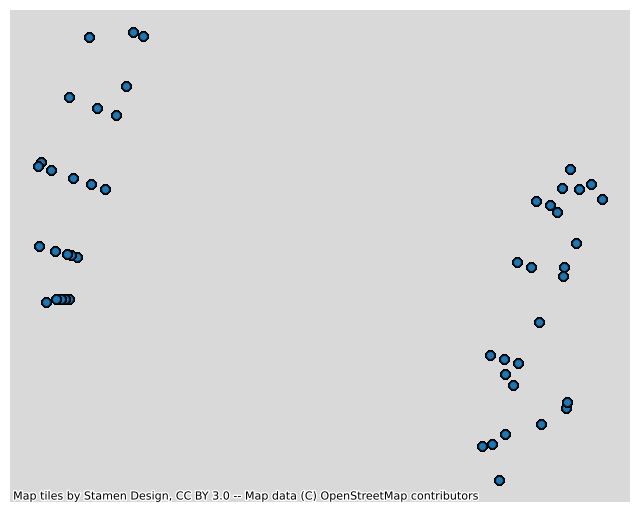

In [ ]:
import contextily as ctx

ax = gdf['geom'].plot(figsize=(8, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [ ]:
import seaborn as sns

In [ ]:
df_graph = df[['sensor', 'unidade', 'direcao_saida', 'latitude', 'longitude', 'estado', 'id_estado']].drop_duplicates()

In [ ]:
df_graph

sensor unidade       direcao_saida  latitude  longitude  estado  \
300    MV-BM-BV-31   l/min               Vazão -3.146391 -51.790752  normal   
301    MV-BM-BV-31    m3/s               Vazão -3.146391 -51.790752  normal   
302    MV-BM-BV-31     l/s               Vazão -3.146391 -51.790752  normal   
1617   MV-BM-BV-51     l/s               Vazão -3.150320 -51.790622  normal   
1618   MV-BM-BV-51   l/min               Vazão -3.150320 -51.790622  normal   
...            ...     ...                 ...       ...        ...     ...   
35514   PZ-D06C-26   m.c.a  Carga Piezométrica -3.147434 -51.774965  normal   
35995   PZ-D06C-27   m.c.a  Carga Piezométrica -3.153753 -51.776665  normal   
35996   PZ-D06C-27       m   Cota Piezométrica -3.153753 -51.776665  normal   
36475   PZ-D06C-28   m.c.a  Carga Piezométrica -3.147005 -51.775266  normal   
36476   PZ-D06C-28       m   Cota Piezométrica -3.147005 -51.775266  normal   

       id_estado  
300            3  
301            3  
302            3  
1617           3  
1618           3  
...          ...  
35514          3  
35995          3  
35996          3  
36475          3  
36476          3  

[134 rows x 7 columns]

In [ ]:
df['size'] = df['id_estado'].apply(lambda x: 20 if x == 3 else ( 50 if x == 2 else 100))

In [ ]:
leituras['direcao_saida'].value_counts()

direcao_saida
Cota Piezométrica                             19200
Carga Piezométrica                            19200
Vazão                                         10554
Cota do NA                                     6206
Recalque (Z)                                   1007
Deslocamento Longitudinal (X)                  1007
Deslocamento Transversal (Y)                   1007
Recalque                                        819
Deslocamento da Estaca Dir(-)/Esq(+)            819
Deslocamento do Afastamento Mont(-)/Jus(+)      819
Leitura                                          32
Name: count, dtype: int64

In [ ]:
df_graph = df[['sensor', 'unidade', 'direcao_saida', 'estado', 'latitude', 'longitude', 'size']]

In [ ]:
import plotly.express as px
fig = px.scatter(df_graph, x="latitude", y="longitude", color="estado", size='size', hover_data=['size'], symbol="estado")
fig.show()

In [ ]:
#gdf.to_file('shape.geojson')

In [ ]:
df[['unidade', 'direcao_saida']].value_counts()

unidade  direcao_saida     
m        Cota Piezométrica     14117
m.c.a    Carga Piezométrica    14117
l/min    Vazão                  2678
l/s      Vazão                  2678
m3/s     Vazão                  2678
Name: count, dtype: int64

In [ ]:
#Todos os sensores, em diferentes escalas
fig = px.line(df, x="data", y="valor", color='sensor')
fig.show()

In [ ]:
aux = df[df['unidade'] == 'm']
aux = aux[aux['direcao_saida'] == 'Cota do NA']
df = df.drop(index=aux.index)

In [ ]:
df[df['direcao_saida'] == 'Vazão']['unidade'].value_counts()

unidade
l/min    2678
m3/s     2678
l/s      2678
Name: count, dtype: int64

In [ ]:
df[['unidade', 'direcao_saida']].value_counts()

unidade  direcao_saida     
m        Cota Piezométrica     14117
m.c.a    Carga Piezométrica    14117
l/min    Vazão                  2678
l/s      Vazão                  2678
m3/s     Vazão                  2678
Name: count, dtype: int64

In [ ]:
#craiação das categorias de dataframe

In [ ]:
df_m_cota_piezometrica = df[df['direcao_saida'] == 'Cota Piezométrica']
df_m_cota_piezometrica = df_m_cota_piezometrica[df_m_cota_piezometrica['unidade'] == 'm']

print(f'df_m_cota_piezometrica {df_m_cota_piezometrica.shape}')

fig = px.line(df_m_cota_piezometrica, x="data", y="valor", color='sensor')
fig.show()

df_m_cota_piezometrica (14117, 18)


In [ ]:
X = df_m_cota_piezometrica[['id_unidade', 'id_direcao_saida', 'id_area', 'month', 'latitude', 'longitude', 'altura', 'valor']]

In [ ]:
from sklearn.ensemble import IsolationForest
Iforest = IsolationForest(max_samples=100, 
                          random_state=1111,
                         contamination=0.05,
                         max_features=1.0,
                         n_estimators=100,
                         verbose=1,
                         n_jobs=-1)
Iforest.fit(X)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


IsolationForest(contamination=0.05, max_samples=100, n_jobs=-1,
                random_state=1111, verbose=1)

In [ ]:
df_m_cota_piezometrica = df[df['direcao_saida'] == 'Cota Piezométrica']
df_m_cota_piezometrica = df_m_cota_piezometrica[df_m_cota_piezometrica['unidade'] == 'm']

print(f'df_m_cota_piezometrica {df_m_cota_piezometrica.shape}')

fig = px.line(df_m_cota_piezometrica, x="data", y="valor", color='sensor')
fig.show()

df_m_cota_piezometrica (14117, 18)


In [ ]:
y_pred = Iforest.predict(X)
df_m_cota_piezometrica['y_pred'] = y_pred

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_m_cota_piezometrica[df_m_cota_piezometrica['y_pred']==1]['data'].values, y=df_m_cota_piezometrica[df_m_cota_piezometrica['y_pred']==1]['valor'].values, mode='markers', name='Não Anomalia'))

fig.add_trace(go.Scatter(x=df_m_cota_piezometrica[df_m_cota_piezometrica['y_pred']==-1]['data'].values, y=df_m_cota_piezometrica[df_m_cota_piezometrica['y_pred']==-1]['valor'].values,
                    mode='markers',
                    name='Anomalia', ))

fig.show()

In [ ]:
df_mca_carga_piezometrica = df[df['direcao_saida'] == 'Carga Piezométrica']
df_mca_carga_piezometrica = df_mca_carga_piezometrica[df_mca_carga_piezometrica['unidade'] == 'm.c.a']

print(f'df_mca_carga_piezométrica {df_mca_carga_piezometrica.shape}')

fig = px.line(df_mca_carga_piezometrica, x="data", y="valor", color='sensor')
fig.show()

df_mca_carga_piezométrica (14117, 18)


In [ ]:
df_lmin_vazao = df[df['direcao_saida'] == 'Vazão']
df_lmin_vazao = df_lmin_vazao[df_lmin_vazao['unidade'] == 'l/min']

print(f'df_lmin_vazao {df_lmin_vazao.shape}')

fig = px.line(df_lmin_vazao, x="data", y="valor", color='sensor')
fig.show()

df_lmin_vazao (2678, 18)


In [ ]:
df_m3s_vazao = df[df['direcao_saida'] == 'Vazão']
df_m3s_vazao = df_m3s_vazao[df_m3s_vazao['unidade'] == 'm3/s']

print(f'df_m3s_vazao {df_m3s_vazao.shape}')

fig = px.line(df_m3s_vazao, x="data", y="valor", color='sensor')
fig.show()

df_m3s_vazao (2678, 18)


In [ ]:
df_ls_vazao = df[df['direcao_saida'] == 'Vazão']
df_ls_vazao = df_ls_vazao[df_ls_vazao['unidade'] == 'l/s']

print(f'df_ls_vazao {df_ls_vazao.shape}')

fig = px.line(df_ls_vazao, x="data", y="valor", color='sensor')
fig.show()

df_ls_vazao (2678, 18)


In [ ]:
# sensores com alertas

query = '''
select *
from leituras l2
where sensor in (select sensor from leituras l where estado in ('alerta', 'atencao') group by sensor order by sensor desc)'''

atencao_alerta = pd.read_sql(query, con=con)

In [ ]:
aux = leituras[leituras['sensor'] == 'PZ-BM-BV-52']

In [ ]:
atencao_alerta.head()

id_sensor  id_unidade  id_direcao_saida  id_estado  id_area       sensor  \
0        194           4                 1          3        1  PZ-BM-BV-52   
1        194           3                 2          3        1  PZ-BM-BV-52   
2        194           4                 1          3        1  PZ-BM-BV-52   
3        194           3                 2          3        1  PZ-BM-BV-52   
4        194           3                 2          3        1  PZ-BM-BV-52   

                  data  valor unidade       direcao_saida  estado      area  
0  2014-06-05 10:15:00   0.14   m.c.a  Carga Piezométrica  normal  Dique 6C  
1  2014-06-05 10:15:00  29.94       m   Cota Piezométrica  normal  Dique 6C  
2  2014-06-06 09:00:00   0.82   m.c.a  Carga Piezométrica  normal  Dique 6C  
3  2014-06-06 09:00:00  30.62       m   Cota Piezométrica  normal  Dique 6C  
4  2014-06-09 09:35:00  30.68       m   Cota Piezométrica  normal  Dique 6C

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

aux = df[df['sensor'] == 'PZ-D06C-05']

fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'normal']['data'].values, y=aux[aux['estado'] == 'normal']['valor'].values,
                    mode='markers',
                    name='normal', ))
fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'atencao']['data'].values, y=aux[aux['estado'] == 'atencao']['valor'].values,
                    mode='markers',
                    name='Atencao', ))
fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'alerta']['data'].values, y=aux[aux['estado'] == 'alerta']['valor'].values,
                    mode='markers',
                    name='Alerta', ))
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

aux = df[df['sensor'] == 'PZ-BM-BV-52']

fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'normal']['data'].values, y=aux[aux['estado'] == 'normal']['valor'].values,
                    mode='markers',
                    name='lines', ))
fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'atencao']['data'].values, y=aux[aux['estado'] == 'atencao']['valor'].values,
                    mode='markers',
                    name='Atencao', ))
fig.add_trace(go.Scatter(x=aux[aux['estado'] == 'alerta']['data'].values, y=aux[aux['estado'] == 'alerta']['valor'].values,
                    mode='markers',
                    name='Alerta', ))
fig.show()

In [ ]:
#X = df[df['sensor'] == 'PZ-BM-BV-52'][['id_sensor', 'id_unidade', 'id_direcao_saida', 'id_area', 'id_estado', 'month', 'latitude', 'longitude', 'altura']]
X = aux[['id_unidade', 'id_direcao_saida', 'id_area', 'month', 'latitude', 'longitude', 'altura', 'valor']]
X2 = aux[['id_sensor', 'id_unidade', 'id_direcao_saida', 'id_area', 'id_estado', 'month', 'data', 'latitude', 'longitude', 'altura', 'valor', 'sensor', 'estado']]

In [ ]:
from sklearn.ensemble import IsolationForest
Iforest = IsolationForest(max_samples=100, 
                          random_state=1111,
                         contamination=0.05,
                         max_features=1.0,
                         n_estimators=100,
                         verbose=1,
                         n_jobs=-1)
Iforest.fit(X)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


IsolationForest(contamination=0.05, max_samples=100, n_jobs=-1,
                random_state=1111, verbose=1)

In [ ]:
y_pred = Iforest.predict(X)
X2['y_pred'] = y_pred

C:\Users\Anselmo\AppData\Local\Temp\ipykernel_8976\3529446864.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=X2[X2['y_pred']==1]['data'].values, y=X2[X2['y_pred']==1]['valor'].values,
                    mode='markers',
                    name='Não Anomalia', ))

fig.add_trace(go.Scatter(x=X2[X2['y_pred']==-1]['data'].values, y=X2[X2['y_pred']==-1]['valor'].values,
                    mode='markers',
                    name='Anomalia', ))

fig.show()

In [ ]:
query = '''
select *
from ocorrencias_sensores_dias
'''

In [ ]:
df = pd.read_sql(query, con=con)

NameError: name 'pd' is not defined

In [ ]:
sdsdfvsdfv